In [153]:
# import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
# store the date from the csv file with dataframe using pandas
df = pd.read_csv("202207-citbike-tripdata.csv", low_memory = False)

In [155]:
# convert started_at and ended_at columns into datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# drop unrelated columns to our analysis, which can shorten our data running time
df = df.drop(['start_lat', 'start_lng', 'end_lat', 'end_lng'], axis = 1)

# drop the start_station_name and end_station_name, since we can use the ids
df = df.drop(['start_station_name', 'end_station_name'], axis = 1)

# create extra column to find trip duration
df['trip_duration'] = df['ended_at'] - df['started_at']

# convert trip duration to minutes
df['trip_duration'] = df['trip_duration'].dt.total_seconds() / 60

# filter to include trip durations that are less than 3 hours
df = df[df['trip_duration'] < 180]

# Warm-up Questions

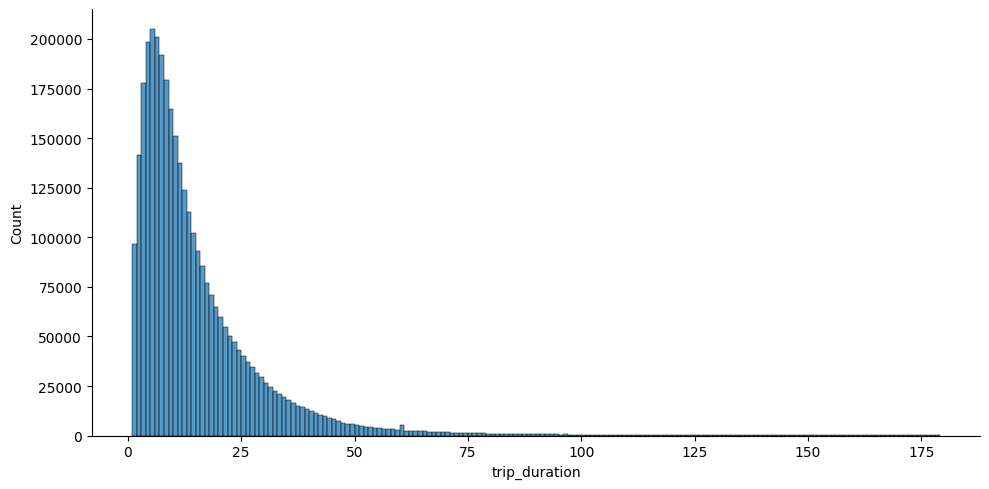

In [156]:
# Q1: Using the start time and end time, compute the duration of each ride in minutes and plot the histogram of ride durations.
sns.displot(data=df, x = 'trip_duration', bins = range(1, 180), aspect = 10/5)

From the histogram, we can see that the most frequent trip duration is around 15 to 20 minutes. Most of the trip durations are less than 75 minutes.


In [157]:
# Q2: What is the expected ride duration (i.e., the average ride duration)? What is the empirical variance of ride duration? What is the probability 
# that a ride duration is greater than 20 min?
print(f"Expected ride duration is equal to {round(df['trip_duration'].mean(),3)}")
print(f"Variance of ride duration is equal to {round(df['trip_duration'].var(),3)}")
print(f"Probability of ride duration greater than 20 minutes is equal to {round(df[df['trip_duration'] > 20].shape[0] / df.shape[0],3)}") 

Expected ride duration is equal to 14.993
Variance of ride duration is equal to 232.81
Probability of ride duration greater than 20 minutes is equal to 0.233


In [158]:
# Q3: What is the probability that a ride duration is greater than 20 min conditioning on the fact that the user is a CitiBike member? Note that the last
# column gives whether the ride is for a casual client or a CitiBike member.
print(f"Probability ride duration is greater than 20 minutes conditioned on the fact that the user is a Citibike member is \
{round(df[(df['member_casual'] == 'member') & (df['trip_duration'] > 20)].shape[0] / df[(df['member_casual'] == 'member')].shape[0],3)} ")

Probability ride duration is greater than 20 minutes conditioned on the fact that the user is a Citibike member is 0.186 


In [159]:
# Q4. Suppose that the duration of some ride is more than 25 min. What is the probability that this ride belongs to a CitiBike member?
print(f"Probability of Citibike member conditioned that duration of bike ride is more than 25 minutes is \
{round(df[(df['member_casual'] == 'member') & (df['trip_duration'] > 25)].shape[0] / df[(df['trip_duration'] > 25)].shape[0],3)}")

Probability of Citibike member conditioned that duration of bike ride is more than 25 minutes is 0.584


In [160]:
# Q5. Expected duration of electric and classic bike rides
print(f"Expected duration of classic bikes is {round(df[df['rideable_type'] == 'classic_bike']['trip_duration'].mean(),3)} minutes")
print(f"Expected duration of electric bikes is {round(df[df['rideable_type'] == 'electric_bike']['trip_duration'].mean(),3)} minutes")

Expected duration of classic bikes is 14.731 minutes
Expected duration of electric bikes is 15.17 minutes


In [161]:
# Q6: What is the expected ride duration of an electric bike? What is the expected ride duration of a classic bike?
# filter for trip durations less than 10 minutes
df_10 = df[df['trip_duration'] < 10]

print(f"Probability of electric bike given duration is less than 10 minutes is {round(df_10[df_10['rideable_type'] == 'electric_bike'].shape[0]/df_10.shape[0],3)}")
print(f"Probability of classic bike given duration is less than 10 minutes is {round(df_10[df_10['rideable_type'] == 'classic_bike'].shape[0]/df_10.shape[0],3)}")

Probability of electric bike given duration is less than 10 minutes is 0.234
Probability of classic bike given duration is less than 10 minutes is 0.763


There's higher probability of a classic bike if the duration is less than 10 minutes, likely because the user is planning on travelling a short distance and does not want to pay the extra cost associated with the electric bike. Shorter durations also means it's likely not a joy-rider or tourist, but a commuter, which means they bike often (and again don't want to pay the extra cost of using electric bikes, and are more inclined to want the physical exercise of biking).

# Project

In [162]:
# using the groupby and the count() function, we wish to find the number of rides for each start_station_id
df_stations = df.groupby(['start_station_id']).count()

# sort popular bike stations by total rides starting from a station from most popular to least popular
df_stations.sort_values(by=['started_at'], ascending = False, inplace=True)
df_stations.head()

# From our results, we know that the most common (top 3) stations are: 1. Broadway & E 14 St, 2. W 21 St & 6 Ave, 3. Broadway & W 58 St
# Top Stations: 5905.12, 6140.05, 6948.10 (Broadway & E 14 St, W 21 St & 6 Ave, Broadway & W 58 St)

,ride_id,rideable_type,started_at,ended_at,end_station_id,member_casual,trip_duration
start_station_id,,,,,,,
5329.03,15830,15830,15830,15830,15814,15830,15830
6140.05,13493,13493,13493,13493,13482,13493,13493
6948.10,12744,12744,12744,12744,12725,12744,12744
5905.12,12645,12645,12645,12645,12629,12645,12645
6364.07,12596,12596,12596,12596,12584,12596,12596


We grouped the rides by their starting stations, and selected three of the most popular stations by starting station. These were the Broadway & E 14th Street, W 21 St and 6 Ave, and Broadway & W 58 St stations (which corresponds to station_ids 5905.12, 6140.05, 6948.10, respectively).

In [163]:
# we remove all the negative trip durations since we are only focusing on trip durations >= 0.
df = df[df['trip_duration'] > 0]

# filter dataset by rides starting and ending at our top locations
df_starting = df[df['start_station_id'].isin(['5905.12', '6140.05', '6948.10'])]
df_ending = df[df['end_station_id'].isin(['5905.12', '6140.05', '6948.10'])]

# check number of remaining rows
print(df_starting.shape[0])
print(df_ending.shape[0])

38869
38422


We removed any rides with negative trip durations, which shouldn't be feasible. We also filtered our dataset to rides that started at our selected stations (which represents bikes leaving the station) and the rides that ended at our selected stations (which represents bikes entering the station).

In [ ]:
# get the day of the week
df_starting['day_of_week'] = pd.to_datetime(df_starting['started_at']).dt.dayofweek
df_ending['day_of_week'] = pd.to_datetime(df_ending['ended_at']).dt.dayofweek 

# filter so starting times is within week day
df_starting = df_starting[df_starting['day_of_week'].isin([0,1,2,3,4])]

# filter so ending times is within week day
df_ending = df_ending[df_ending['day_of_week'].isin([0,1,2,3,4])]

We filtered for rides that started at or ended during the weekdays, as we wanted to model a regular work day's bike distribution. 

In [165]:
# using the datetime function get the hour of starting and ending
df_starting['hour'] = pd.to_datetime(df_starting['started_at']).dt.hour
df_ending['hour'] = pd.to_datetime(df_ending['ended_at']).dt.hour

# using the datetime function get the date of starting and ending
df_starting['date'] = pd.to_datetime(df_starting['started_at']).dt.date
df_ending['date'] = pd.to_datetime(df_ending['ended_at']).dt.date

# get the minutes for binning purposes later
df_starting['minutes'] = pd.to_datetime(df_starting['started_at']).dt.minute
df_ending['minutes'] = pd.to_datetime(df_ending['ended_at']).dt.minute

# categorize the type of bike movement. If starting from station, the station loses a bike. If ending at station, the station gains a bike
df_starting['bike_movement'] = -1
df_ending['bike_movement'] = 1

# split both starting and ending df into morning and evening
# we define the time for morning to be from 5am to 11am and evening time to be from 4pm to 9pm
df_starting_morning = df_starting[df_starting['hour'].isin([5, 6, 7, 8, 9, 10, 11])]
df_starting_evening = df_starting[df_starting['hour'].isin([16, 17, 18, 19, 20, 21])]

df_ending_morning = df_ending[df_ending['hour'].isin([5, 6, 7, 8, 9, 10, 11])]
df_ending_evening = df_ending[df_ending['hour'].isin([16, 17, 18, 19, 20, 21])]

We performed some featurization to isolate the date, hour, and minutes into separate columns. We also added a new column called "bike_movement". As mentioned earlier, rides starting at a station means that a bike left the station (number of bikes within the station decreased by 1). Rides ending at a station means that a bike entered the station (number of bikes within the station increased by 1). We also split the morning and evening hours to represent the typical commuter hours. We assumed that during the hours that are not included in our morning and evening buckets, Citibike staff are redistributing bikes across the different stations. 

In [166]:
# combine the morning and evening datasets so we will have one main dataframe
df_morning = pd.concat([df_starting_morning, df_ending_morning])
df_evening = pd.concat([df_starting_evening, df_ending_evening])

# set bins to 5 minutes
time_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

# add bins to dataframe 
df_morning['bins'] = pd.cut(df_morning['minutes'], time_bins)
df_evening['bins'] = pd.cut(df_evening['minutes'], time_bins)

# check the the top 5 values from our output
df_morning.head()

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,member_casual,trip_duration,day_of_week,hour,date,minutes,bike_movement,bins
1380076,B5A3337DF856C910,classic_bike,2022-07-14 07:50:06,2022-07-14 08:05:22,6948.10,6345.08,member,15.266667,3,7,2022-07-14,50,-1,"(45, 50]"
1380087,11066823E54C7001,classic_bike,2022-07-04 08:13:34,2022-07-04 08:30:57,6948.10,6345.08,member,17.383333,0,8,2022-07-04,13,-1,"(10, 15]"
1380437,C71017C491F11492,classic_bike,2022-07-26 07:46:07,2022-07-26 07:58:04,6948.10,6345.08,member,11.950000,1,7,2022-07-26,46,-1,"(45, 50]"
1380448,376CF3C798AB9CDE,classic_bike,2022-07-05 07:27:14,2022-07-05 07:54:02,6948.10,5826.02,member,26.800000,1,7,2022-07-05,27,-1,"(25, 30]"
1380486,B1F7A93D311061C1,electric_bike,2022-07-29 09:52:14,2022-07-29 10:05:53,6948.10,6331.01,casual,13.650000,4,9,2022-07-29,52,-1,"(50, 55]"


We consolidated our preprocessed datasets by combining morning and evening dataframe into one dataframe, and created the 5 minute bins for each hour, and added it as a column.

In [167]:
# Seperate into first station rides (5905.12)
df_morning_station_1 = df_morning[(df_morning['start_station_id'] == '5905.12') | (df_morning['end_station_id'] == '5905.12')]
df_evening_station_1 = df_evening[(df_evening['start_station_id'] == '5905.12') | (df_evening['end_station_id'] == '5905.12')]

# Seperate into second station rides (6140.05) 
df_morning_station_2 = df_morning[(df_morning['start_station_id'] == '6140.05') | (df_morning['end_station_id'] == '6140.05')]
df_evening_station_2 = df_evening[(df_evening['start_station_id'] == '6140.05') | (df_evening['end_station_id'] == '6140.05')]

# Separate into third station rides (6948.10)
df_morning_station_3 = df_morning[(df_morning['start_station_id'] == '6948.10') | (df_morning['end_station_id'] == '6948.10')]
df_evening_station_3 = df_evening[(df_evening['start_station_id'] == '6948.10') | (df_evening['end_station_id'] == '6948.10')]

# calculate the movement during each bin across each date + hour by summing the bike_movement column 

# Station 1 - Movement per bin
df_morning_1 = df_morning_station_1.sort_values(['date', 'hour', 'bins'], ascending = False).groupby(['date', 'hour', 'bins'])['bike_movement'].sum()
df_evening_1 = df_evening_station_1.sort_values(['date', 'hour', 'bins'], ascending = False).groupby(['date', 'hour', 'bins'])['bike_movement'].sum()

# Station 2 - Movement per bin
df_morning_2 = df_morning_station_2.sort_values(['date', 'hour', 'bins'], ascending = False).groupby(['date', 'hour', 'bins'])['bike_movement'].sum()
df_evening_2 = df_evening_station_2.sort_values(['date', 'hour', 'bins'], ascending = False).groupby(['date', 'hour', 'bins'])['bike_movement'].sum()

# Station 3 - Movement per bin
df_morning_3 = df_morning_station_3.sort_values(['date', 'hour', 'bins'], ascending = False).groupby(['date', 'hour', 'bins'])['bike_movement'].sum()
df_evening_3 = df_evening_station_3.sort_values(['date', 'hour', 'bins'], ascending = False).groupby(['date', 'hour', 'bins'])['bike_movement'].sum()


We then separated our consolidated dataset into the morning and evening subsets for each station that we selected, and calculated the bike movement across each bin by summing the "bike_movement" column we created. 

In [168]:
# helper function to calculate bounds for station function

def lower_bounds(x):
    if x < 0:
        return -x
    else:
        return 0
# If total movement (x) is negative or bikes are leaving, we need to have at least (-x) bikes
# If total movement (x) is positive or bikes are added, we don't need to have minimum supply of bikes


def upper_bounds(x, cap):
    if x > 0:
        return cap - x
    else:
        return cap
# If total movement (x) is positive or bikes are added, then max number of bikes we can have so to not violate capacity is cap - x
# If total movement (x) is negative or bikes are leaving, then max number of bikes we can have is just the capacity

In [169]:
# Assumption: We assume that someone replenishes the bikes during the off-peak hours that aren't included within our morning and evening hour ranges. This person also replenishes to the same
# amount at the start of each morning and evening period

# Determine starting position for each day for first station (5905.12 - Broadway & E 14 St)

# Capacity at location = 112 (per Citi bike app)
capacity_1 = 112

# Find total movement in and out of the station per day
starting_morning_1 = df_morning_station_1.sort_values(['date', 'hour', 'bins'], ascending = False).groupby(['date'])['bike_movement'].sum()
starting_evening_1 = df_evening_station_1.sort_values(['date', 'hour', 'bins'], ascending = False).groupby(['date'])['bike_movement'].sum()

# Take the max and min movement for each station during the bins and throughout the days
morning_bin_min, morning_bin_max = df_morning_1.min(), df_morning_1.max()
morning_day_min, morning_day_max = starting_morning_1.min(), starting_morning_1.max()
evening_bin_min, evening_bin_max = df_evening_1.min(), df_evening_1.max()
evening_day_min, evening_day_max = starting_evening_1.min(), starting_evening_1.max()

# Find the lower and upper bounds using helper function
print(f'Lower bound of bikes that to be available at station 1 in the morning is {max(lower_bounds(morning_bin_min), lower_bounds(morning_day_min))}')
print(f'Upper bound of bikes that need to be available at station 1 in the morning is {min(upper_bounds(morning_bin_max, capacity_1), upper_bounds(morning_day_max, capacity_1))}')

print(f'Lower bound of bikes that to be available at station 1 in the evening is {max(lower_bounds(evening_bin_min), lower_bounds(evening_day_min))}')
print(f'Upper bound of bikes that need to be available at station 1 in the evening is {min(upper_bounds(evening_bin_max, capacity_1), upper_bounds(evening_day_max, capacity_1))}')

# set starting position as arbitrary value that fits bounds
starting_morning_1 = 23
starting_evening_1 = 81


Lower bound of bikes that to be available at station 1 in the morning is 7
Upper bound of bikes that need to be available at station 1 in the morning is 39
Lower bound of bikes that to be available at station 1 in the evening is 53
Upper bound of bikes that need to be available at station 1 in the evening is 104


In [170]:
# Determine starting position for each day for second station (6140.05 - W 21 St & 6 Ave)
# Capacity at location = 71 (per Citi bike app)
capacity_2 = 71

# Find total movement in and out of the station per day
starting_morning_2 = df_morning_station_2.sort_values(['date', 'hour', 'bins'], ascending = False).groupby(['date'])['bike_movement'].sum()
starting_evening_2 = df_evening_station_2.sort_values(['date', 'hour', 'bins'], ascending = False).groupby(['date'])['bike_movement'].sum()

# take the max and min movement for each station during the bins and throughout the days
morning_bin_min, morning_bin_max = df_morning_2.min(), df_morning_2.max()
morning_day_min, morning_day_max = starting_morning_2.min(), starting_morning_2.max()
evening_bin_min, evening_bin_max = df_evening_2.min(), df_evening_2.max()
evening_day_min, evening_day_max = starting_evening_2.min(), starting_evening_2.max()

# Find the lower and upper bounds using helper function
print(f'Lower bound of bikes that to be available at station 2 in the morning is {max(lower_bounds(morning_bin_min), lower_bounds(morning_day_min))}')
print(f'Upper bound of bikes that need to be available at station 2 in the morning is {min(upper_bounds(morning_bin_max, capacity_2), upper_bounds(morning_day_max, capacity_2))}')

print(f'Lower bound of bikes that to be available at station 2 in the evening is {max(lower_bounds(evening_bin_min), lower_bounds(evening_day_min))}')
print(f'Upper bound of bikes that need to be available at station 2 in the evening is {min(upper_bounds(evening_bin_max, capacity_2), upper_bounds(evening_day_max, capacity_2))}')

# set starting position as arbitrary value that fits bounds
starting_morning_2 = 16
starting_evening_2 = 54


Lower bound of bikes that to be available at station 2 in the morning is 8
Upper bound of bikes that need to be available at station 2 in the morning is 23
Lower bound of bikes that to be available at station 2 in the evening is 47
Upper bound of bikes that need to be available at station 2 in the evening is 61


In [171]:
# Determine starting position for each day for third station (6948.10 - Broadway & W 58 St)
# Capacity at location = 75 (per Citi bike app)
capacity_3 = 75

# Find total movement in and out of the station per day
starting_morning_3 = df_morning_station_3.sort_values(['date', 'hour', 'bins'], ascending = False).groupby(['date'])['bike_movement'].sum()
starting_evening_3 = df_evening_station_3.sort_values(['date', 'hour', 'bins'], ascending = False).groupby(['date'])['bike_movement'].sum()

# take the max and min movement for each station during the bins and throughout the days
morning_bin_min, morning_bin_max = df_morning_3.min(), df_morning_3.max()
morning_day_min, morning_day_max = starting_morning_3.min(), starting_morning_3.max()
evening_bin_min, evening_bin_max = df_evening_3.min(), df_evening_3.max()
evening_day_min, evening_day_max = starting_evening_3.min(), starting_evening_3.max()

# Find the lower and upper bounds using helper function
print(f'Lower bound of bikes that to be available at station 3 in the morning is {max(lower_bounds(morning_bin_min), lower_bounds(morning_day_min))}')
print(f'Upper bound of bikes that need to be available at station 3 in the morning is {min(upper_bounds(morning_bin_max, capacity_3), upper_bounds(morning_day_max, capacity_3))}')

print(f'Lower bound of bikes that to be available at station 3 in the evening is {max(lower_bounds(evening_bin_min), lower_bounds(evening_day_min))}')
print(f'Upper bound of bikes that need to be available at station 3 in the evening is {min(upper_bounds(evening_bin_max, capacity_3), upper_bounds(evening_day_max, capacity_3))}')

# set starting position as arbitrary value that fits bounds
starting_morning_3 = 64
starting_evening_3 = 56

Lower bound of bikes that to be available at station 3 in the morning is 36
Upper bound of bikes that need to be available at station 3 in the morning is 67
Lower bound of bikes that to be available at station 3 in the evening is 56
Upper bound of bikes that need to be available at station 3 in the evening is 62


When it comes to establishing the starting state for each station, we use the assumption that Citibike staff replenishes our stations to a fixed number for each station for the morning and evening hours. We determined this fixed number by first establishing upper and lower bounds for each station based on the data available. The lower bound is established by looking at the largest number of exiting bikes per bin and per aggregate morning / evening (i.e. what is the largest number of bikes exiting across the entire morning / evening buckets across all the days). This lower bound represents the minimum number of bikes we need to have to service all the bikes leaving the station. The upper bound is established by looking at the highest number of entering bikes per bin and per aggregate morning / evening, and subtracting that from the capacity of the station. This upper bound represents the minimum number of bike docks that we need to have available to allow all the bikes entering the station to successfully dock at the station. Once we had these bounds, we arbitrarily selected a number for each station's morning and evening hours.

In [172]:
# Create bike states using the starting positions for first station (5905.12 - Broadway & E 14 St): Capacity = 112

# Convert groupby series to dataframe
df_morning_1.to_frame()
df_evening_1.to_frame()

# Unstack the dataframe so dates are the columns
df_morning_1 = df_morning_1.unstack(level = 'date')
df_evening_1 = df_evening_1.unstack(level = 'date')

# Perform cumulative sum with the starting position
df_morning_1 = df_morning_1.cumsum() + starting_morning_1
df_evening_1 = df_evening_1.cumsum() + starting_evening_1

# Convert to numpy array and transpose, so each day's states are the rows
states_morning_1 = df_morning_1.to_numpy()
states_evening_1 = df_evening_1.to_numpy()

states_morning_1 = np.transpose(states_morning_1)
states_evening_1 = np.transpose(states_evening_1)

In [173]:
# Create bike states using the starting positions for second station (6140.05 - W 21 St & 6 Ave): Capacity = 71

# Convert groupby series to dataframe
df_morning_2.to_frame()
df_evening_2.to_frame()

# Unstack the dataframe so dates are the columns
df_morning_2 = df_morning_2.unstack(level = 'date')
df_evening_2 = df_evening_2.unstack(level = 'date')

# Perform cumulative sum with the starting position
df_morning_2 = df_morning_2.cumsum() + starting_morning_2
df_evening_2 = df_evening_2.cumsum() + starting_evening_2

# Convert to numpy array and transpose, so each day's states are the rows
states_morning_2 = df_morning_2.to_numpy()
states_evening_2 = df_evening_2.to_numpy()

states_morning_2 = np.transpose(states_morning_2)
states_evening_2 = np.transpose(states_evening_2)

In [174]:
# Create bike states using the starting positions for third station (6948.10 - Broadway & W 58 St): Capacity = 75

# Convert groupby series to dataframe
df_morning_3.to_frame()
df_evening_3.to_frame()

# Unstack the dataframe so dates are the columns
df_morning_3 = df_morning_3.unstack(level = 'date')
df_evening_3 = df_evening_3.unstack(level = 'date')

# Perform cumulative sum with the starting position
df_morning_3 = df_morning_3.cumsum() + starting_morning_3
df_evening_3 = df_evening_3.cumsum() + starting_evening_3

# Convert to numpy array and transpose, so each day's states are the rows
states_morning_3 = df_morning_3.to_numpy()
states_evening_3 = df_evening_3.to_numpy()

states_morning_3 = np.transpose(states_morning_3)
states_evening_3 = np.transpose(states_evening_3)

In [175]:
# helper function to create transition matrix
def transition_matrix(arr, capacity):
    # Create NxN matrix using capacity

    # we assume that there's a "dummy" ride for each state to any state, which is why we create an array of ones
    p = np.ones(shape=(capacity+1,capacity+1))

    # loop through each of the days
    for i in range(arr.shape[0]):
        # loop through the states within a day, subtract one because there's no transition for last state
        for j in range(arr.shape[1] - 1):
            # identify the starting and ending states
            starting_state = arr[i][j]
            ending_state = arr[i][j+1]

            # increment the count within transition matrix
            # we increase by 100 in order to diminish effect of the dummy rides
            p[starting_state][ending_state] += 100
    
    # scale each row so it sums up to one
    for i in range(p.shape[0]):
        if p[i].sum() > 0:
            p[i] = p[i] / p[i].sum() 
    
    return p

In [176]:
# Create transition matrix for first station (5905.12 - Broadway & E 14 St): Capacity = 112
p_morning_1 = pd.DataFrame(transition_matrix(states_morning_1, capacity_1))
p_evening_1 = pd.DataFrame(transition_matrix(states_evening_1, capacity_1))

# Create transition matrix for second station (6140.05 - W 21 St & 6 Ave): Capacity = 71
p_morning_2 = pd.DataFrame(transition_matrix(states_morning_2, capacity_2))
p_evening_2 = pd.DataFrame(transition_matrix(states_evening_2, capacity_2))

# Create transition matrix for third station (6948.10 - Broadway & W 58 St): Capacity = 75
p_morning_3 = pd.DataFrame(transition_matrix(states_morning_3, capacity_3))
p_evening_3 = pd.DataFrame(transition_matrix(states_evening_3, capacity_3))

To compute the transition matrix for each station's morning and evening hours, we first established an NxN matrix of ones, where N is the station's capacity. This matrix will initially hold the count of rides from one state to another state. The reason we established a matrix of ones is that we're adding "dummy" rides from every state to every other state that would allow for our resulting transition matrix to be irreducible. To compensate, for every "actual" ride from one state to another, we increment the count by 100 so to minimize the effect of the "dummy" ride. Once we populate this matrix containing our counts, we scale each row such that the sum of each row is equal to one. The resulting matrices are our transition matrices for each station. 

In [177]:
# function to get stationary distribution (reference: https://stackoverflow.com/questions/31791728/python-code-explanation-for-stationary-distribution-of-a-markov-chain)
def stationary_dist(arr):

    # shape of stationary distribution
    n = arr.shape[0]

    # initial state of pi, which assumes each state has the same probability
    pi = np.full((1, n), 1 / n)
    
    # loop through until pi and updated_pi are equal
    while True:
        updated_pi = np.dot(pi, arr)
        if np.allclose(pi, updated_pi):
            return pi
            break
        pi = updated_pi

# retrieve the stationary distributions
stat_morning_1 = stationary_dist(p_morning_1)
stat_evening_1 = stationary_dist(p_evening_1)

stat_morning_2 = stationary_dist(p_morning_2)
stat_evening_2 = stationary_dist(p_evening_2)

stat_morning_3 = stationary_dist(p_morning_3)
stat_evening_3 = stationary_dist(p_evening_3)

In [178]:
# check that stationary distributions sum up to 1
print(np.sum(stat_morning_1))
print(np.sum(stat_evening_1))
print(np.sum(stat_morning_2))
print(np.sum(stat_evening_2))
print(np.sum(stat_morning_3))
print(np.sum(stat_evening_3))

1.0000000000000007
1.0000000000000022
1.0000000000000013
1.0000000000000007
1.0000000000000004
1.0000000000000002


We use the transition matrix to calculate the stationary distribution. We first create an initial stationary distribution where the distribution is equal for all states. Then we iteratively multiply the initial stationary distribution with our transition matrix until it converges to a steady state stationary distribution.

## Station 1 - Broadway & E 14 St

In [179]:
# flatten the array and multiplty by 100 for percentages
stat_morning_1 = np.ndarray.flatten(stat_morning_1) * 100

# view the stationary distributions for station 1
print("Stationary Distribution for Broadway & E 14 St Citibike station for the morning hours:")
print(stat_morning_1)

# print bike numbers where stationary distribution > 2%
print("Bike States with high stationary probability:")
print(np.argwhere(stat_morning_1 > 2.0))

Stationary Distribution for Broadway & E 14 St Citibike station for the morning hours:
[0.08759687 0.08759687 0.08759687 0.08759687 0.08759687 0.08759687
 0.08759687 0.08759687 0.08759687 0.08759687 0.16351995 0.23805123
 0.38948444 0.53140672 0.44452884 0.5711495  0.15784909 0.37756557
 0.43140104 0.72153835 1.27481102 1.74229424 2.08195381 3.22908272
 2.42183949 1.34908858 1.45399545 1.39489122 1.35506988 1.5831439
 0.83758698 0.76082001 0.55088372 0.7373957  0.71627776 0.67834813
 0.75124646 0.71878101 0.9689476  0.47310197 0.64621009 1.2124254
 1.57232343 1.66026209 0.6416941  0.93359783 1.56953279 1.45687088
 1.30389485 0.98467132 1.7326653  1.35296964 1.76068946 2.72679402
 2.53466234 3.01600231 1.91394598 1.85934343 2.4688313  1.29639214
 1.76398037 1.66801171 1.47850979 0.90916365 0.91569178 0.35518709
 0.89107407 0.89132237 1.03369427 1.28377617 1.09930258 0.98485165
 1.16691839 0.3769801  0.76585125 1.25906924 0.9436991  0.74786915
 0.9490743  1.32048042 1.06117528 0.38470371

Since we set the initial state of bikes to be 23 at the beginning of the morning period for Station 1, and we observe that the states with the highest stationary probabilities are largely greater than our initial state, we can infer that bikes are entering this station during the morning hours. We see a concentration of probabilities between 53-58 bikes, which would represent the most likely number of bikes we'll observe our station having at any given point in time.  

In [180]:
# flatten the array and multiplty by 100 for percentages
stat_evening_1 = np.ndarray.flatten(stat_evening_1) * 100

# view the stationary distributions for station 1
print("Stationary Distribution for Broadway & E 14 St Citibike station for the evening hours:")
print(stat_evening_1)

# print bike numbers where stationary distribution > 2%
print("Bike States with high stationary probability:")
print(np.argwhere(stat_evening_1 > 2.0))

Stationary Distribution for Broadway & E 14 St Citibike station for the evening hours:
[0.10266469 0.10266469 0.10266469 0.10266469 0.10266469 0.10266469
 0.10266469 0.10266469 0.10266469 0.10266469 0.10266469 0.10266469
 0.10266469 0.10266469 0.10266469 0.10266469 0.10266469 0.10266469
 0.19674945 0.10266469 0.29448472 0.19503544 0.10266469 0.10266469
 0.19423069 0.10266469 0.53300079 0.40364555 0.92917802 0.40311028
 0.50959541 0.33105762 0.62289109 0.20427858 0.46125804 0.36262642
 0.69838218 0.61991849 0.76135657 1.00668985 1.15487619 0.82425816
 1.11226161 1.67746742 1.64903552 1.53258827 1.64494552 1.38146797
 2.79434758 1.68921418 1.36290045 1.43320607 0.71382614 0.89913854
 1.42500579 1.67884451 1.18215228 0.89713998 0.90705193 1.76997973
 1.26588892 1.1576126  1.0972496  1.58318057 1.53763331 1.30725885
 2.42588342 1.99775607 1.89636697 1.56827059 2.75787375 2.94765
 2.10773704 2.05604775 2.63321081 1.38418244 1.85935035 1.94914188
 2.01864253 5.45736236 1.35162925 1.78782605 

Since we set the initial state of bikes to be 81 at the beginning of the evening period for Station 1, and we observe that the states with the highest stationary probabilities are largely lower than our initial state, we can infer that bikes are leaving this station during the evening hours. In this case, we see a concentration of probabilities between 70-79 bikes. In general, we can infer that Station 1 is located near a commercial neighborhood that people commute to for work in the morning (bikes entering the station). In the evenings, they will commute back home (bikes leaving the station). 

## Station 2 - W 21 St & 6 Ave

In [181]:
# flatten the array and multiplty by 100 for percentages
stat_morning_2 = np.ndarray.flatten(stat_morning_2) * 100

# view the stationary distributions for station 2
print("Stationary Distribution for W 21 St & 6 Ave station for the morning hours:")
print(stat_morning_2)

# print bike numbers where stationary distribution > 2%
print("Bike States with high stationary probability:")
print(np.argwhere(stat_morning_2 > 3.0))

Stationary Distribution for W 21 St & 6 Ave station for the morning hours:
[0.05606569 0.05606569 0.05606569 0.05606569 0.05606569 0.05606569
 0.05606569 0.05606569 0.05606569 0.05606569 0.05606569 0.05606569
 0.11173119 0.38186433 0.51188846 0.96251112 2.60565484 2.23577665
 1.69448405 2.15932421 2.11185462 1.42958897 1.24312422 1.36804188
 1.26020257 1.32958673 1.63063902 1.32496919 0.99870586 1.36180482
 1.40327629 0.94471449 1.09611781 0.89488222 1.30892303 0.89901461
 0.98137998 0.74547378 0.68578835 1.22454887 0.70135331 0.95955752
 1.19491237 0.79583807 1.37923398 1.70636496 1.36051865 1.88340187
 2.52100976 3.18662691 2.69962284 4.70761108 3.84171469 3.01105818
 4.37815938 3.22980898 2.73461798 3.90958575 5.52043307 3.73096957
 2.16584225 2.51473862 1.99029509 2.34672709 1.23553251 0.37941087
 0.05606569 0.05606569 0.05606569 0.05606569 0.05606569 0.05606569]
Bike States with high stationary probability:
[[49]
 [51]
 [52]
 [53]
 [54]
 [55]
 [57]
 [58]
 [59]]


Since we set the initial state of bikes to be 16 at the beginning of the morning period for Station 2, and we observe that the states with the highest stationary probabilities are all greater than our initial state, we can infer that bikes are entering this station during the morning hours. Here, the concentration of probabilities is between 51-59, which again represents the range of bikes we'll most likely observe at our station. 

In [182]:
# flatten the array and multiplty by 100 for percentages
stat_evening_2 = np.ndarray.flatten(stat_evening_2) * 100

# view the stationary distributions for station 2
print("Stationary Distribution for W 21 St & 6 Ave station for the evening hours:")
print(stat_evening_2)

# print bike numbers where stationary distribution > 2%
print("Bike States with high stationary probability:")
print(np.argwhere(stat_evening_2 > 3.0))

Stationary Distribution for W 21 St & 6 Ave station for the evening hours:
[0.05198524 0.05198524 0.05198524 0.20442847 0.4146498  0.17956801
 0.49612737 0.81890531 0.85736599 0.05198524 0.18412708 0.87446557
 1.15228815 0.9032153  0.05198524 1.10676769 2.22239557 1.53362498
 5.93818847 3.26819    3.6838728  6.26436184 3.83359337 4.18648908
 3.79007159 4.04978209 3.50714051 3.16185978 2.77861487 1.8364616
 3.95092709 2.19454732 1.66394481 1.37104047 1.14828624 0.95826917
 1.08548976 1.65267046 1.78427094 1.40136949 1.47734736 1.67227676
 2.17048055 1.86501678 1.50593274 2.18134404 1.39695754 1.7075921
 1.50816907 1.05588345 0.97384552 0.98057406 0.80881049 0.729515
 0.64673274 0.84883635 0.63539099 0.61456425 0.68381834 0.36605174
 0.43838776 0.38961127 0.12029183 0.05198524 0.08939016 0.05198524
 0.05198524 0.05198524 0.05198524 0.05198524 0.05198524 0.05198524]
Bike States with high stationary probability:
[[18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [30]]


The initial state of bikes we set for the evening period for Station 2 is 54. Given that we observe states with the highest stationary probabilities are all less than our initial state, we can infer that bikes are leaving this station during the morning hours. The concentration of probabilities is between 18-30 bikes. Similar to Station 1, we can infer that Station 2 is located near a commercial neighborhood where people commute to work in the morning, and commute back home in the evenings. 

## Station 3 - Broadway & W 58 St

In [183]:
# flatten the array and multiplty by 100 for percentages
stat_morning_3 = np.ndarray.flatten(stat_morning_3) * 100

# view the stationary distributions for station 3
print("Stationary Distribution for Broadway & W 58 St station for the morning hours:")
print(stat_morning_3)

# print bike numbers where stationary distribution > 2%
print("Bike States with high stationary probability:")
print(np.argwhere(stat_morning_3 > 4.0))

Stationary Distribution for Broadway & W 58 St station for the morning hours:
[0.05688984 0.05688984 0.05688984 0.05688984 0.05688984 0.05688984
 0.05688984 0.05688984 0.05688984 0.05688984 0.05688984 0.05688984
 0.05688984 0.05688984 0.05688984 0.05688984 0.05688984 0.05688984
 0.05688984 0.15035019 0.18937216 0.16448871 0.23720109 0.30720914
 0.27214952 0.31083881 0.38477178 0.36564738 0.5521045  0.32969878
 0.48622439 0.49241158 0.33107529 0.58042492 0.22920399 0.56959967
 0.41740299 0.58620914 0.40235583 0.88936026 1.44724399 0.77859777
 0.36528664 0.52106604 0.35604011 0.50099362 0.27494636 0.27765676
 0.20358513 0.05688984 0.49263344 0.41961612 0.27778709 0.62562734
 1.62136155 1.91055637 3.25440351 4.43121452 5.07347389 5.23589906
 5.66311427 5.65004859 7.42051342 7.85224611 8.66116015 7.16543363
 5.23220384 5.04397268 4.31248555 2.34513934 1.21138124 1.02733314
 0.50675803 0.28142161 0.11601221 0.05688984]
Bike States with high stationary probability:
[[57]
 [58]
 [59]
 [60]
 [

The initial state we set for the morning period for Station 3 was 64. Here the states with the highest stationary probabilities are centered around the initial state that we set. Therefore, we can infer that this is a location where there's typically an equal amount of bikes entering and leaving the station. This is likely to be some sort of tourist destination where individuals are making pit stops. 

In [184]:
# flatten the array and multiplty by 100 for percentages
stat_evening_3 = np.ndarray.flatten(stat_evening_3) * 100

# view the stationary distributions for station 3
print("Stationary Distribution for Broadway & W 58 St station for the evening hours:")
print(stat_evening_3)

# print bike numbers where stationary distribution > 2%
print("Bike States with high stationary probability:")
print(np.argwhere(stat_evening_3 > 4.0))

Stationary Distribution for Broadway & W 58 St station for the evening hours:
[0.05970606 0.05970606 0.05970606 0.13997203 0.05970606 0.22510793
 0.14126737 0.14755843 0.05970606 0.05970606 0.05970606 0.05970606
 0.154619   0.05970606 0.05970606 0.3303255  0.1548178  0.45178138
 1.23039621 0.68938798 0.83317024 0.4312528  0.89269056 0.70301005
 1.42533617 1.40536731 1.39075226 0.72236748 0.3908319  0.55403029
 0.14010157 0.30244574 0.05970606 0.05970606 0.13846522 0.05970606
 0.21737498 0.14149589 0.14149589 0.37324888 2.06547013 1.00407147
 1.56433747 1.77974681 2.99511901 3.03240377 2.57608053 2.22395192
 3.05747353 2.72921224 3.7169503  4.09369104 4.2414382  6.2661804
 7.29614866 5.21097491 6.04197401 5.07813841 4.07316653 3.0823944
 2.93107431 2.61317781 2.06263806 1.29951583 0.93967936 0.81644293
 1.16716441 0.46351176 0.26143065 0.19399179 0.05970606 0.1141892
 0.12458636 0.05970606 0.05970606 0.05970606]
Bike States with high stationary probability:
[[51]
 [52]
 [53]
 [54]
 [55]

The initial state we set for the evening period for Station 3 was 56. Again, we observe the same behavior as in the morning, where the states with the highest stationary probabilities are centered around the initial state, which means there's an equal amount of bikes entering and leaving the station. We can again reach the same conclusion that this may be located near a tourist location. 